,label,comment
0,1,need
1,0,might well milk last
2,1,ask locktrap
3,1,im glad community doesnt make console player f...
4,0,joke put stitch


Epoch 1/5
1626/1626 - 362s - 223ms/step - accuracy: 0.6331 - loss: 225.4424 - val_accuracy: 0.6294 - val_loss: 0.6338
Epoch 2/5
1626/1626 - 343s - 211ms/step - accuracy: 0.6439 - loss: 45.4830 - val_accuracy: 0.6342 - val_loss: 0.6325
Epoch 3/5
1626/1626 - 296s - 182ms/step - accuracy: 0.6633 - loss: 0.6099 - val_accuracy: 0.6398 - val_loss: 0.6293
Epoch 4/5
1626/1626 - 333s - 205ms/step - accuracy: 0.6439 - loss: 57.8570 - val_accuracy: 0.6217 - val_loss: 0.6434
Epoch 5/5
1626/1626 - 341s - 210ms/step - accuracy: 0.6538 - loss: 0.6776 - val_accuracy: 0.6269 - val_loss: 0.6383


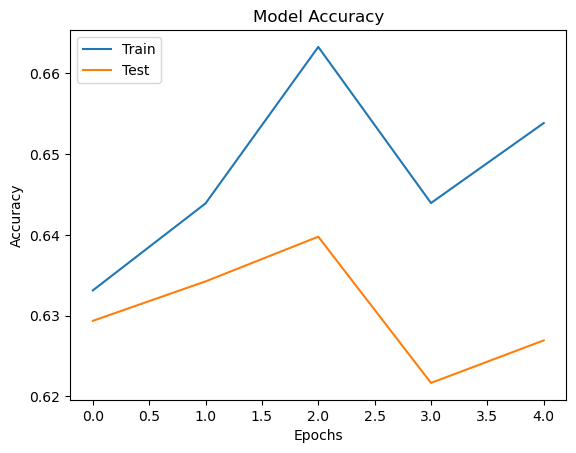

813/813 - 23s - 28ms/step - accuracy: 0.6269 - loss: 0.6383
Test Loss: 0.6383101940155029
Test Accuracy: 0.6269322633743286


In [1]:
# Install TensorFlow if not already installed
!pip install tensorflow

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, SpatialDropout1D
import matplotlib.pyplot as plt

# Magic inline for displaying plots inline
%matplotlib inline

# Load the dataset
file_path = 'cleaned_balanced_dataset_FINAL.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
display(data.head())

# Ensure all comments are strings
data['comment'] = data['comment'].astype(str)

# Preprocess the text data
max_features = 2000
max_len = 100

tokenizer = Tokenizer(num_words=max_features, oov_token='<OOV>')
tokenizer.fit_on_texts(data['comment'])
sequences = tokenizer.texts_to_sequences(data['comment'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Preparing the labels
labels = data['label'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Building the Bidirectional GRU neural network model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(GRU(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
